# 필요 라이브러리 및 함수

In [34]:
#사전준비
import tensorflow as tf
import numpy as np
from PIL import Image 
import glob
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)
print(np.__version__)
print("PIL 라이브러리 import 완료!")

2.15.0
1.26.4
PIL 라이브러리 import 완료!


In [35]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(32,32)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    return len(images)

In [36]:
import numpy as np

def load_data(img_path, number_of_data=220*3):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [37]:
cls_pth = ["/scissor","/rock","/paper"]

# data_hkp

In [18]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
data_path = './data_hkp'
num_img = 0
for cp in cls_pth :
    image_dir_path = data_path + cp
    print(image_dir_path)
    len_c = resize_images(image_dir_path)
    print(cp + "이미지 resize 완료!")
    num_img += len_c
(x_train, y_train)=load_data(data_path,num_img)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

./data_hkp/scissor
220  images to be resized.
220  images resized.
/scissor이미지 resize 완료!
./data_hkp/rock
220  images to be resized.
220  images resized.
/rock이미지 resize 완료!
./data_hkp/paper
220  images to be resized.
220  images resized.
/paper이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 660 입니다.
x_train shape: (660, 32, 32, 3)
y_train shape: (660,)


라벨:  0


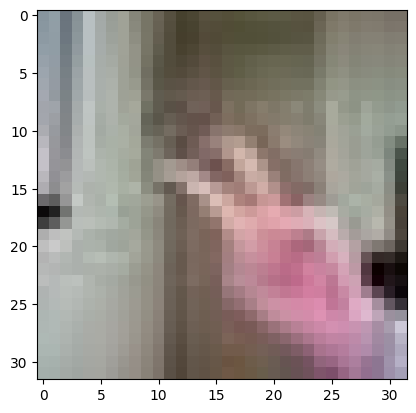

In [64]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
print('라벨: ', y_train[1])

# Data_total

In [38]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
data_path = './data_total'
num_img = 0
for cp in cls_pth :
    image_dir_path = data_path + cp
    print(image_dir_path)
    len_c = resize_images(image_dir_path)
    print(cp + "이미지 resize 완료!")
    num_img += len_c
(x_train, y_train)=load_data(data_path,num_img)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

./data_total/scissor
265  images to be resized.
265  images resized.
/scissor이미지 resize 완료!
./data_total/rock
284  images to be resized.
284  images resized.
/rock이미지 resize 완료!
./data_total/paper
286  images to be resized.
286  images resized.
/paper이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 835 입니다.
x_train shape: (835, 32, 32, 3)
y_train shape: (835,)


# Baseline Model

In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 3)                

In [53]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
from tensorflow.keras.callbacks import EarlyStopping
# 모델 훈련
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train_norm, y_train, validation_split=0.2, epochs=50, batch_size=10,callbacks=[early_stopping])

Epoch 1/50
67/67 [==============================] - 1s 18ms/step - loss: 0.9743 - accuracy: 0.5674 - val_loss: 1.5741 - val_accuracy: 0.0000e+00
Epoch 2/50
67/67 [==============================] - 1s 12ms/step - loss: 0.8267 - accuracy: 0.6527 - val_loss: 1.3513 - val_accuracy: 0.0000e+00
Epoch 3/50
67/67 [==============================] - 1s 12ms/step - loss: 0.6598 - accuracy: 0.7470 - val_loss: 1.2120 - val_accuracy: 0.0719
Epoch 4/50
67/67 [==============================] - 1s 11ms/step - loss: 0.5358 - accuracy: 0.8054 - val_loss: 1.1883 - val_accuracy: 0.3114
Epoch 5/50
67/67 [==============================] - 1s 12ms/step - loss: 0.4309 - accuracy: 0.8428 - val_loss: 0.7807 - val_accuracy: 0.6647
Epoch 6/50
67/67 [==============================] - 1s 12ms/step - loss: 0.3361 - accuracy: 0.8847 - val_loss: 1.0843 - val_accuracy: 0.4192
Epoch 7/50
67/67 [==============================] - 1s 12ms/step - loss: 0.2552 - accuracy: 0.9296 - val_loss: 0.5112 - val_accuracy: 0.8263
Epoch

# KDH test data

In [42]:
data_path = './test_data_total'
num_img = 0
for cp in cls_pth :
    image_dir_path = data_path + cp
    print(image_dir_path)
    len_c = resize_images(image_dir_path)
    print(cp + "이미지 resize 완료!")
    num_img += len_c
    

./test_data_total/scissor
101  images to be resized.
101  images resized.
/scissor이미지 resize 완료!
./test_data_total/rock
108  images to be resized.
108  images resized.
/rock이미지 resize 완료!
./test_data_total/paper
100  images to be resized.
100  images resized.
/paper이미지 resize 완료!


In [54]:
(x_test, y_test)=load_data(data_path,num_img)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

학습데이터(x_train)의 이미지 개수는 309 입니다.
x_test shape: (309, 32, 32, 3)
y_test shape: (309,)
10/10 - 0s - loss: 1189.2762 - accuracy: 0.2654 - 260ms/epoch - 26ms/step
test_loss: 1189.2762451171875 
test_accuracy: 0.2653721570968628


10/10 [==============================] - 0s 17ms/step


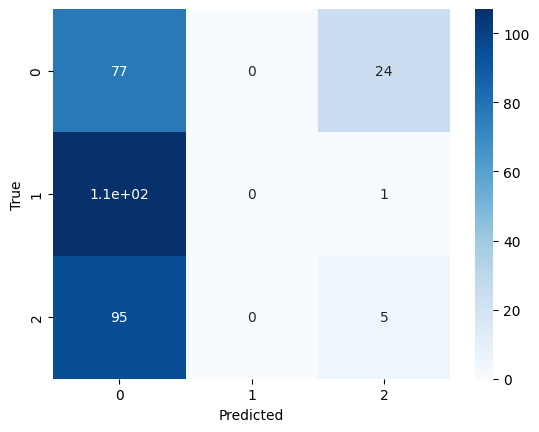

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

cm = confusion_matrix(y_test,predicted_labels)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

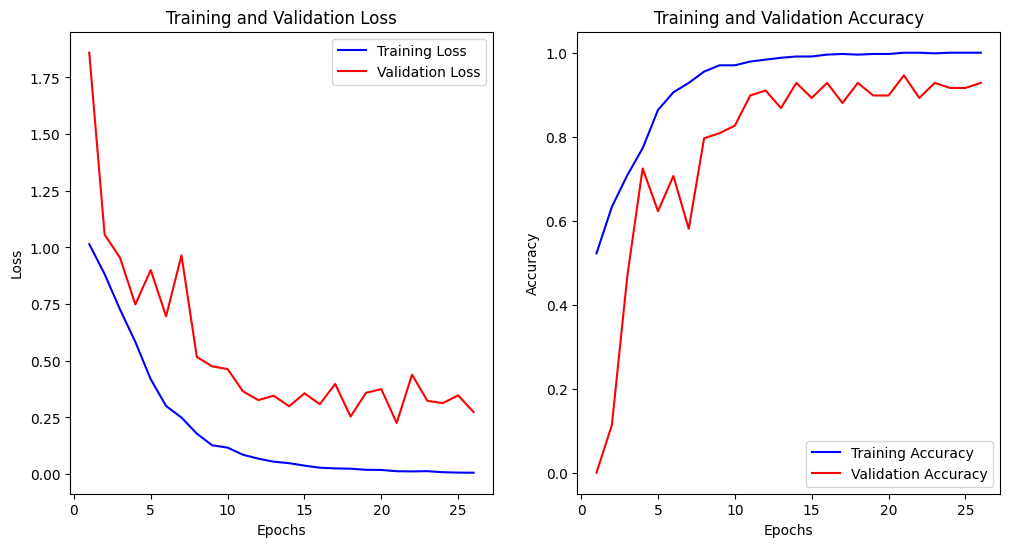

In [45]:
# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# New Model

In [58]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(512, activation='relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 2, 2, 128)        

In [59]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
# 모델 훈련
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train_norm, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

Epoch 1/50
21/21 [==============================] - 1s 36ms/step - loss: 1.0387 - accuracy: 0.4461 - val_loss: 1.4682 - val_accuracy: 0.0000e+00
Epoch 2/50
21/21 [==============================] - 0s 22ms/step - loss: 0.9666 - accuracy: 0.5644 - val_loss: 1.5670 - val_accuracy: 0.0000e+00
Epoch 3/50
21/21 [==============================] - 0s 16ms/step - loss: 0.8563 - accuracy: 0.6452 - val_loss: 1.2467 - val_accuracy: 0.0000e+00
Epoch 4/50
21/21 [==============================] - 0s 16ms/step - loss: 0.7497 - accuracy: 0.6722 - val_loss: 1.2874 - val_accuracy: 0.0000e+00
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.6176 - accuracy: 0.7515 - val_loss: 1.0184 - val_accuracy: 0.3473
Epoch 6/50
21/21 [==============================] - 0s 14ms/step - loss: 0.5213 - accuracy: 0.7874 - val_loss: 0.7524 - val_accuracy: 0.7126
Epoch 7/50
21/21 [==============================] - 0s 16ms/step - loss: 0.4243 - accuracy: 0.8458 - val_loss: 0.4852 - val_accuracy: 0.86

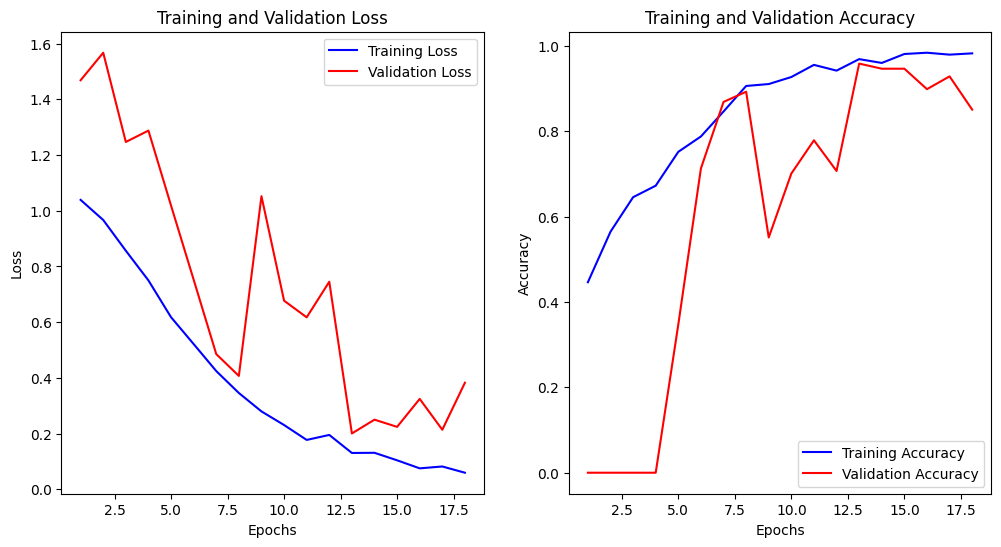

In [60]:
# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [61]:
# data_path = './test_data_total'
# num_img = 0
# for cp in cls_pth :
#     image_dir_path = data_path + cp
#     print(image_dir_path)
#     len_c = resize_images(image_dir_path)
#     print(cp + "이미지 resize 완료!")
#     num_img += len_c
(x_test, y_test)=load_data(data_path,num_img)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

학습데이터(x_train)의 이미지 개수는 309 입니다.
x_test shape: (309, 32, 32, 3)
y_test shape: (309,)
10/10 - 0s - loss: 1217.3085 - accuracy: 0.3301 - 273ms/epoch - 27ms/step
test_loss: 1217.3084716796875 
test_accuracy: 0.3300970792770386


In [62]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

10/10 [==============================] - 0s 9ms/step


10/10 [==============================] - 0s 12ms/step


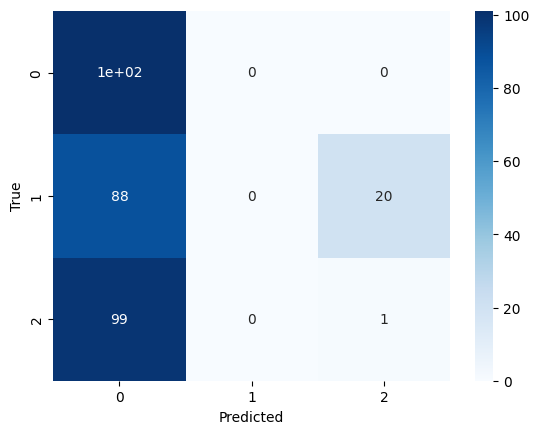

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

cm = confusion_matrix(y_test,predicted_labels)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과d 0


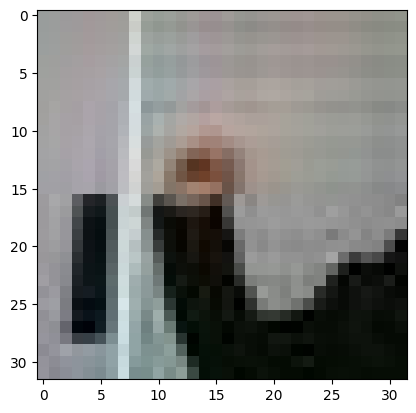

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과d 2


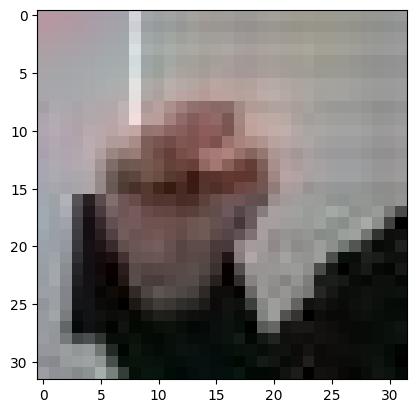

예측확률분포: [1. 0. 0.]
라벨: 2, 예측결과d 0


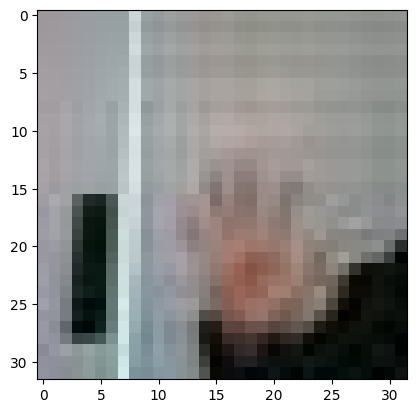

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과d 2


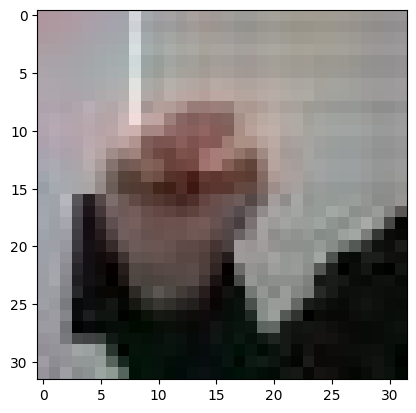

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과d 0


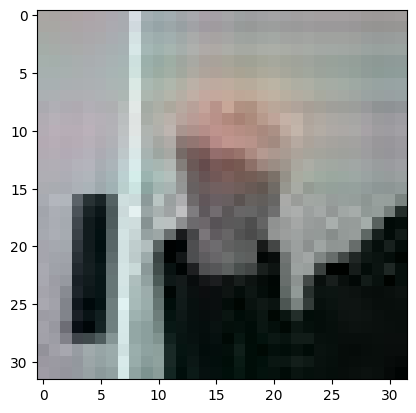

In [65]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과d " + str(predicted_labels[n]))
    plt.imshow(x_test[n])
    plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.8019 - accuracy: 0.7848 - 179ms/epoch - 18ms/step
test_loss: 0.8019248247146606 
test_accuracy: 0.7847682237625122


In [13]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)


10/10 [==============================] - 0s 4ms/step


예측확률분포: [4.0062442e-02 1.1038952e-08 9.5993751e-01]
라벨: 0, 예측결과: 2


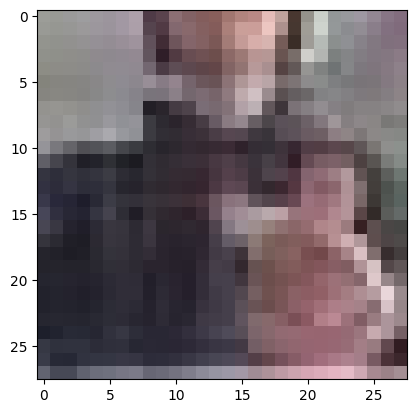

예측확률분포: [9.9959344e-01 9.7979880e-10 4.0662775e-04]
라벨: 2, 예측결과: 0


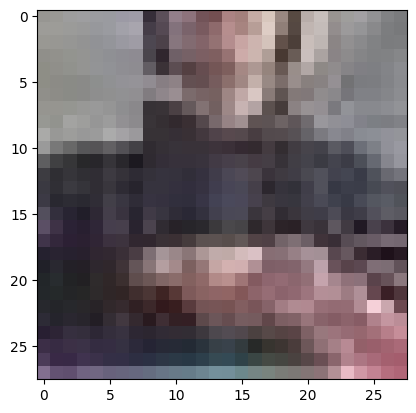

예측확률분포: [0.12490321 0.04699033 0.8281064 ]
라벨: 1, 예측결과: 2


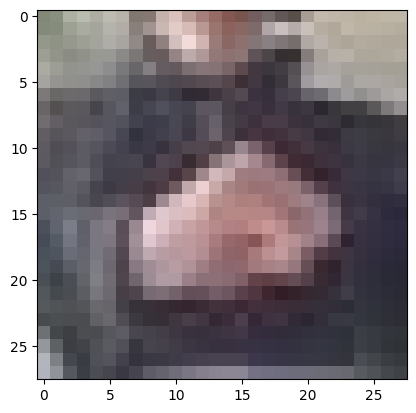

예측확률분포: [2.5333625e-01 7.5585083e-10 7.4666381e-01]
라벨: 0, 예측결과: 2


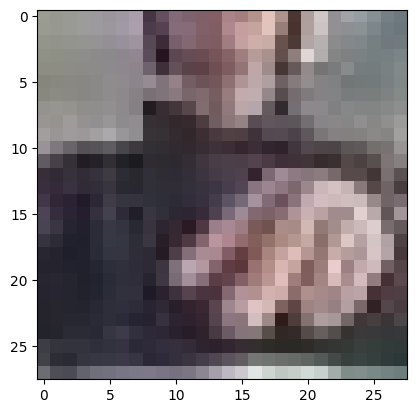

예측확률분포: [0.25131336 0.07103229 0.6776543 ]
라벨: 1, 예측결과: 2


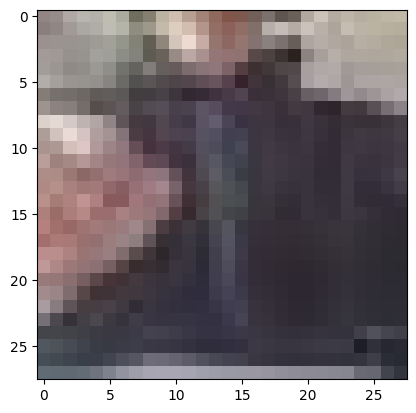

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n])
    plt.show()

In [40]:
test_dir = './test_data2'
image_dir_path = test_dir +"/scissor"
resize_images(image_dir_path)

image_dir_path = test_dir + "/rock"
resize_images(image_dir_path)

image_dir_path = test_dir +"/paper"
resize_images(image_dir_path)

image_dir_path = "./test_data2"
(x_test, y_test)=load_data(image_dir_path, number_of_data=101+138+124)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

101  images to be resized.
101  images resized.
138  images to be resized.
138  images resized.
124  images to be resized.
124  images resized.
학습데이터(x_train)의 이미지 개수는 363 입니다.
x_test shape: (363, 28, 28, 3)
y_test shape: (363,)


In [41]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 4.5059 - accuracy: 0.3499 - 311ms/epoch - 26ms/step
test_loss: 4.505851745605469 
test_accuracy: 0.3498622477054596


In [42]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)


12/12 [==============================] - 0s 5ms/step


예측확률분포: [1.358375e-05 6.166185e-06 9.999802e-01]
라벨: 0, 예측결과: 2


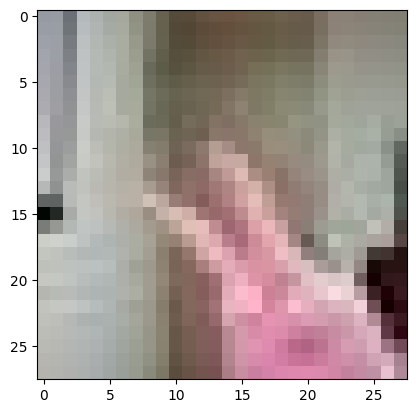

예측확률분포: [0.11316384 0.00544277 0.88139343]
라벨: 1, 예측결과: 2


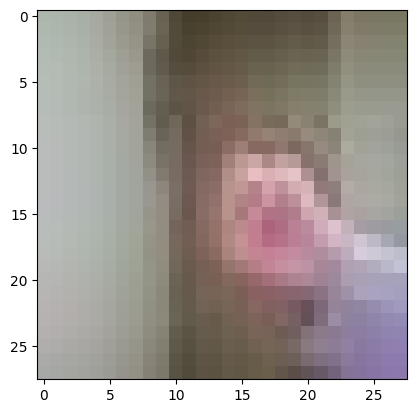

예측확률분포: [3.4201213e-03 8.0097001e-04 9.9577880e-01]
라벨: 1, 예측결과: 2


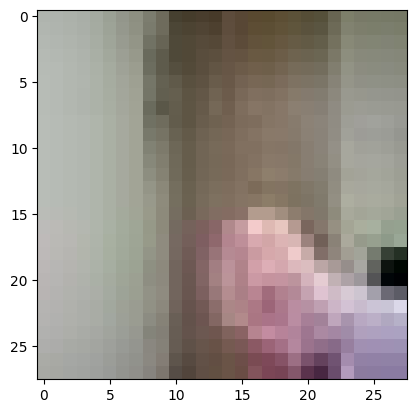

예측확률분포: [1.0383678e-02 1.8751869e-05 9.8959762e-01]
라벨: 1, 예측결과: 2


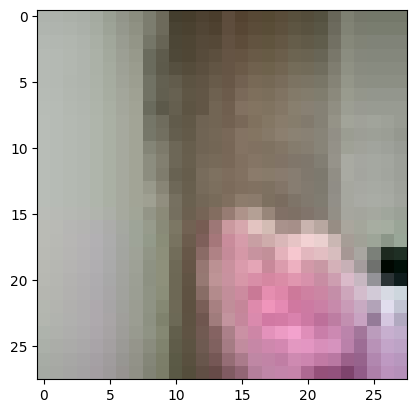

예측확률분포: [1.5150466e-02 4.9337791e-04 9.8435611e-01]
라벨: 1, 예측결과: 2


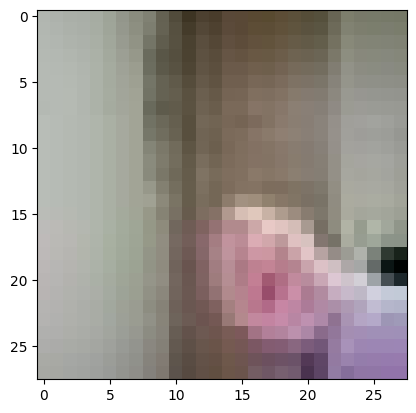

In [43]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n])
    plt.show()